In [70]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import math
from datetime import datetime
import matplotlib.pyplot as plt
from random import randint
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

#  К-ближайших соседей, методом опорных векторов, Деревьями решений

## Flow

1. slpit to test and train sets
2. Vectorize with CountVectozier
3. TF IDFTransformer
4. Classification

All this using pipline

In [3]:
categories = ['sci.space', 'comp.graphics', 'talk.politics.misc', 'rec.sport.hockey', 'comp.sys.mac.hardware', 'sci.crypt', 'sci.electronics', 'sci.med','soc.religion.christian','comp.os.ms-windows.misc', 'misc.forsale',] 
remove = ('headers', 'footers', 'quotes')
twenty_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42, categories = categories, remove = remove )
twenty_test = fetch_20newsgroups(subset='test', shuffle=True, random_state=42, categories = categories, remove = remove )


In [4]:
len(twenty_test.filenames)

4244

In [5]:
print (twenty_train.target_names[2])

comp.sys.mac.hardware


In [6]:
vect = CountVectorizer(max_features = 10000, stop_words = 'english')

In [7]:
train_data = vect.fit_transform(twenty_train.data)
test_data = vect.transform(twenty_test.data)



In [8]:
x = list(zip(vect.get_feature_names(), np.ravel(train_data.sum(axis=0))))
def SortbyTF(inputStr):
    return inputStr[1]
x.sort(key=SortbyTF, reverse = True)
print (x[:10])


[('ax', 62386), ('max', 4532), ('like', 2180), ('don', 2111), ('just', 1996), ('people', 1996), ('use', 1985), ('know', 1950), ('new', 1720), ('think', 1695)]


In [9]:
tfidf = TfidfTransformer(use_idf = True).fit(train_data)
train_data_tfidf = tfidf.transform(train_data)


In [10]:
text_clf = Pipeline([('vect', CountVectorizer(max_features= 1000, stop_words = 'english')),
                    ('tfidf', TfidfTransformer(use_idf = True)),
                    ('clf', KNeighborsClassifier (n_neighbors=1)),])   


In [11]:
text_clf = text_clf.fit(twenty_train.data, twenty_train.target)

In [12]:
prediction = text_clf.predict(twenty_test.data)

In [13]:
print(classification_report(twenty_test.target, prediction))

              precision    recall  f1-score   support

           0       0.59      0.16      0.25       389
           1       0.58      0.23      0.33       394
           2       0.47      0.15      0.23       385
           3       0.60      0.28      0.38       390
           4       0.67      0.30      0.42       399
           5       0.11      0.87      0.20       396
           6       0.35      0.06      0.10       393
           7       0.62      0.11      0.19       396
           8       0.53      0.15      0.23       394
           9       0.75      0.28      0.41       398
          10       0.58      0.12      0.19       310

    accuracy                           0.25      4244
   macro avg       0.53      0.25      0.27      4244
weighted avg       0.53      0.25      0.27      4244



# TRUE TESTING

In [46]:
def draw_chart(avg_prediction_results, prof_lenghts): 
    profiles_lengths = prof_lenghts
    x = []
    y = []
    legend = []
    plt.figure(figsize=(10,5))
    for func_name, func_data in avg_prediction_results.items():
        y_set = []
        for length, data in func_data.items():
            y_set.append(data[0])
        y.append(y_set)
        x.append(profiles_lengths)
        legend.append(func_name)
    for i in range(len(x)):
        plt.plot(x[i],y[i])
    plt.legend(legend)

    plt.show()

In [22]:
def pipline_calculation(cls_set, profiles_lengths):
    categories = ['sci.space', 'comp.graphics', 'talk.politics.misc', 'rec.sport.hockey', 
                  'comp.sys.mac.hardware', 'sci.crypt', 'sci.electronics', 'sci.med',
                  'soc.religion.christian','comp.os.ms-windows.misc', 'misc.forsale',] 
    categories = categories[:cls_set]
    remove = ('headers', 'footers', 'quotes')
    twenty_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42, 
                                      categories = categories, remove = remove )
    twenty_test = fetch_20newsgroups(subset='test', shuffle=True, random_state=42,
                                     categories = categories, remove = remove )


    prediction_results = {}

    for classifier in classifiers:
        prediction_results[classifier] = {}
        for length in profiles_lengths:
            time_start = datetime.now()
            text_clf = Pipeline([('vect', CountVectorizer(max_features= length, stop_words = 'english')),
                                ('tfidf', TfidfTransformer(use_idf = False)),
                                ('clf', classifier),])
            text_clf = text_clf.fit(twenty_train.data, twenty_train.target)
            prediction = text_clf.predict(twenty_test.data)
            time_finish = datetime.now()
            proc_time = time_finish - time_start
            precision = precision_score(twenty_test.target, prediction, average='macro')
            accuracy = accuracy_score(twenty_test.target, prediction)
            recall = recall_score(twenty_test.target, prediction, average='macro')
            prediction_results[classifier][length] = [precision, accuracy, recall, proc_time]
            print(f'classifier: {classifier}; length:{length}; precision: {precision}; accuracy: {accuracy}; recall: {recall}; time: {proc_time};')
    
    return prediction_results







In [16]:
classifiers = [
    KNeighborsClassifier(1),
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier()]

In [17]:
profiles_lengths = [10, 20, 50, 100, 150, 200, 300, 500, 750, 1000, 1500, 2000, 2500, 3000, 4000, 5000, 6000]

In [18]:
classes_sets = [3,5,7,9,11]

In [23]:

all_sets_results = []

for cls_set in classes_sets:
    time_start = datetime.now()
    print(f'***************CALCULATION FOR {cls_set} CLASSES STARTED**********************')
    prediction_results = pipline_calculation(cls_set, profiles_lengths)
    print(f'***************CALCULATION FOR {cls_set} CLASSES DONE**********************')
    all_sets_results.append(prediction_results)
    time_finish = datetime.now()
    proc_time = time_finish - time_start
    print(print(f'***************LOOP OF{cls_set} CLASSES DONE for {proc_time} ***************'))

***************CALCULATION FOR 3 CLASSES STARTED**********************
classifier: KNeighborsClassifier(n_neighbors=1); length:10; precision: 0.48405123504755676; accuracy: 0.4794144556267155; recall: 0.4734682930189962; time: 0:00:00.440329;
classifier: KNeighborsClassifier(n_neighbors=1); length:20; precision: 0.5189439807874462; accuracy: 0.515096065873742; recall: 0.5125875893046441; time: 0:00:00.453861;
classifier: KNeighborsClassifier(n_neighbors=1); length:50; precision: 0.5505760761560329; accuracy: 0.5535224153705398; recall: 0.5509476461542929; time: 0:00:00.456464;
classifier: KNeighborsClassifier(n_neighbors=1); length:100; precision: 0.5881607601380626; accuracy: 0.5892040256175664; recall: 0.5874682416640463; time: 0:00:00.459555;
classifier: KNeighborsClassifier(n_neighbors=1); length:150; precision: 0.5964777212943831; accuracy: 0.5901189387008234; recall: 0.5881058849264663; time: 0:00:00.462285;
classifier: KNeighborsClassifier(n_neighbors=1); length:200; precision: 

classifier: DecisionTreeClassifier(); length:20; precision: 0.5494833020046896; accuracy: 0.5388838060384263; recall: 0.5331852178004114; time: 0:00:00.411398;
classifier: DecisionTreeClassifier(); length:50; precision: 0.6489607965611215; accuracy: 0.6450137236962489; recall: 0.6381034504773415; time: 0:00:00.443619;
classifier: DecisionTreeClassifier(); length:100; precision: 0.6561294715517044; accuracy: 0.6532479414455626; recall: 0.6471248734893261; time: 0:00:00.413397;
classifier: DecisionTreeClassifier(); length:150; precision: 0.701577230121062; accuracy: 0.7017383348581885; recall: 0.6961231643236321; time: 0:00:00.503058;
classifier: DecisionTreeClassifier(); length:200; precision: 0.6898593616609664; accuracy: 0.6898444647758463; recall: 0.6812929352286398; time: 0:00:00.526716;
classifier: DecisionTreeClassifier(); length:300; precision: 0.6855368095034334; accuracy: 0.6861848124428179; recall: 0.6826351094709331; time: 0:00:00.535884;
classifier: DecisionTreeClassifier();

classifier: KNeighborsClassifier(); length:6000; precision: 0.22661109090378515; accuracy: 0.22269579115610016; recall: 0.22148700387671671; time: 0:00:01.112013;
classifier: SVC(); length:10; precision: 0.419673006385509; accuracy: 0.337773042088439; recall: 0.3394109961584235; time: 0:00:01.117664;
classifier: SVC(); length:20; precision: 0.49284142239320794; accuracy: 0.419286094832179; recall: 0.4178508077885888; time: 0:00:01.180077;
classifier: SVC(); length:50; precision: 0.5557496984616012; accuracy: 0.5546084176877997; recall: 0.5527432539033631; time: 0:00:01.325038;
classifier: SVC(); length:100; precision: 0.6333197009758849; accuracy: 0.6366542354821524; recall: 0.6352280375600419; time: 0:00:01.527888;
classifier: SVC(); length:150; precision: 0.6642720959753681; accuracy: 0.6680873734683005; recall: 0.6662749175558998; time: 0:00:01.680548;
classifier: SVC(); length:200; precision: 0.6889158306596792; accuracy: 0.6925945657964837; recall: 0.6902162620574874; time: 0:00:0

classifier: KNeighborsClassifier(n_neighbors=1); length:6000; precision: 0.7484319450081249; accuracy: 0.1980495123780945; recall: 0.19281284665031853; time: 0:00:01.569533;
classifier: KNeighborsClassifier(); length:10; precision: 0.2602225486356645; accuracy: 0.2108027006751688; recall: 0.2101864354884723; time: 0:00:01.212743;
classifier: KNeighborsClassifier(); length:20; precision: 0.30092989819501126; accuracy: 0.24868717179294825; recall: 0.24573476500289135; time: 0:00:01.280771;
classifier: KNeighborsClassifier(); length:50; precision: 0.3462150963905189; accuracy: 0.32633158289572395; recall: 0.3236432594386505; time: 0:00:01.180040;
classifier: KNeighborsClassifier(); length:100; precision: 0.4021468895111248; accuracy: 0.39797449362340587; recall: 0.3962325043656154; time: 0:00:01.215518;
classifier: KNeighborsClassifier(); length:150; precision: 0.40605341292333036; accuracy: 0.3983495873968492; recall: 0.3947093549897719; time: 0:00:01.255845;
classifier: KNeighborsClassi

classifier: KNeighborsClassifier(n_neighbors=1); length:10; precision: 0.1505198362702362; accuracy: 0.14277456647398845; recall: 0.14267557115494317; time: 0:00:01.660718;
classifier: KNeighborsClassifier(n_neighbors=1); length:20; precision: 0.21317827410537815; accuracy: 0.20202312138728323; recall: 0.2003240031682764; time: 0:00:01.889953;
classifier: KNeighborsClassifier(n_neighbors=1); length:50; precision: 0.24955538795425683; accuracy: 0.23554913294797689; recall: 0.23399148563722472; time: 0:00:01.768642;
classifier: KNeighborsClassifier(n_neighbors=1); length:100; precision: 0.3060862800051132; accuracy: 0.3109826589595376; recall: 0.30874267371431957; time: 0:00:01.961159;
classifier: KNeighborsClassifier(n_neighbors=1); length:150; precision: 0.3379351580129446; accuracy: 0.33439306358381504; recall: 0.33219618941574275; time: 0:00:01.878142;
classifier: KNeighborsClassifier(n_neighbors=1); length:200; precision: 0.3517430079867103; accuracy: 0.3312138728323699; recall: 0.3

classifier: DecisionTreeClassifier(); length:20; precision: 0.25350859565256756; accuracy: 0.22369942196531792; recall: 0.2207344819782328; time: 0:00:01.220416;
classifier: DecisionTreeClassifier(); length:50; precision: 0.2882484424227424; accuracy: 0.276878612716763; recall: 0.27398740242432934; time: 0:00:01.213422;
classifier: DecisionTreeClassifier(); length:100; precision: 0.38718075718154715; accuracy: 0.37196531791907517; recall: 0.36880253879728936; time: 0:00:01.225702;
classifier: DecisionTreeClassifier(); length:150; precision: 0.4056027133748972; accuracy: 0.4052023121387283; recall: 0.40209507673090616; time: 0:00:01.314836;
classifier: DecisionTreeClassifier(); length:200; precision: 0.4661055359993517; accuracy: 0.4482658959537572; recall: 0.4440315287983741; time: 0:00:02.038208;
classifier: DecisionTreeClassifier(); length:300; precision: 0.47149389480579806; accuracy: 0.47109826589595377; recall: 0.4671314647970639; time: 0:00:01.496587;
classifier: DecisionTreeClas

classifier: KNeighborsClassifier(); length:6000; precision: 0.1476774201886202; accuracy: 0.1204052780395853; recall: 0.12011890999427478; time: 0:00:02.591276;
classifier: SVC(); length:10; precision: 0.1280075962646732; accuracy: 0.146559849198869; recall: 0.14379228779624315; time: 0:00:03.940769;
classifier: SVC(); length:20; precision: 0.2865955334016015; accuracy: 0.2177191328934967; recall: 0.2158680946619877; time: 0:00:04.674822;
classifier: SVC(); length:50; precision: 0.38123345178854806; accuracy: 0.3124410933081998; recall: 0.30964703154661266; time: 0:00:06.409006;
classifier: SVC(); length:100; precision: 0.44923791300852506; accuracy: 0.40032987747408105; recall: 0.3987958039182736; time: 0:00:08.365761;
classifier: SVC(); length:150; precision: 0.48674123000095887; accuracy: 0.45311027332704995; recall: 0.4516497065040416; time: 0:00:09.153190;
classifier: SVC(); length:200; precision: 0.5056990351151416; accuracy: 0.47785108388312914; recall: 0.4761826881103396; time:

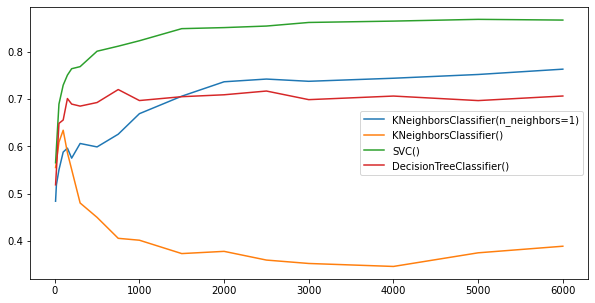

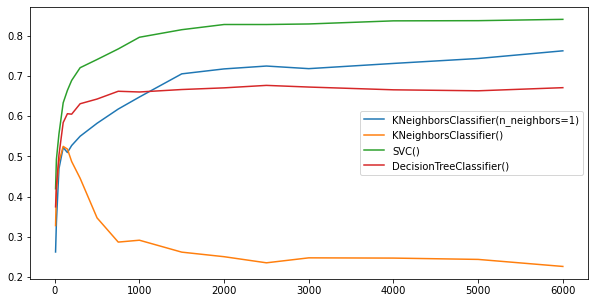

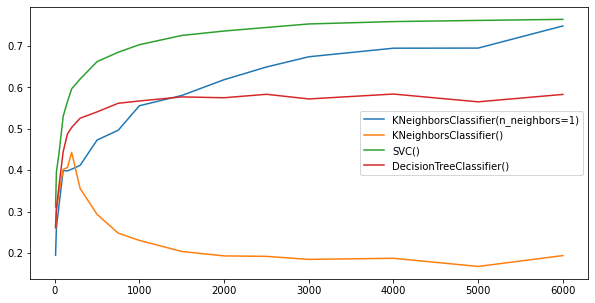

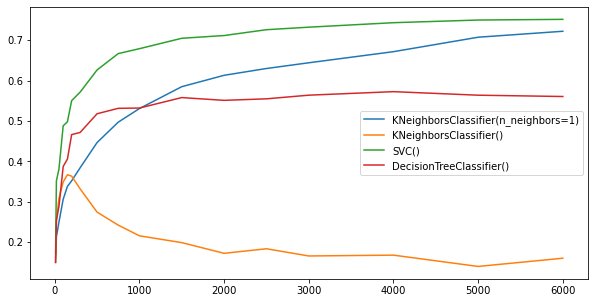

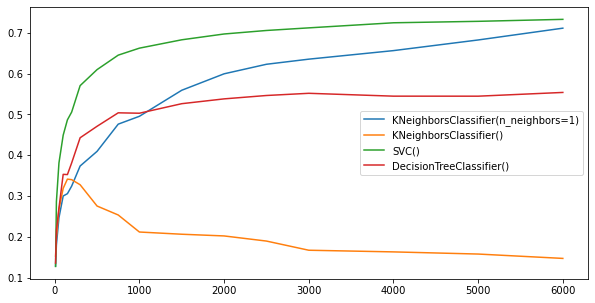

In [47]:
for cls_set in all_sets_results:
    draw_chart(cls_set, profiles_lengths)

In [27]:
all_sets_results[4]

{KNeighborsClassifier(n_neighbors=1): {10: [0.1288760934514843,
   0.11663524976437323,
   0.11539845706858244,
   datetime.timedelta(seconds=2, microseconds=819225)],
  20: [0.18086993698189113,
   0.16517436380772857,
   0.1636666957057895,
   datetime.timedelta(seconds=2, microseconds=172029)],
  50: [0.24726561903976246,
   0.2311498586239397,
   0.22912013224264227,
   datetime.timedelta(seconds=2, microseconds=175983)],
  100: [0.3003896736713175,
   0.29688972667295005,
   0.2947058346572122,
   datetime.timedelta(seconds=2, microseconds=401910)],
  150: [0.3060939455444154,
   0.3053722902921772,
   0.30352929926527744,
   datetime.timedelta(seconds=2, microseconds=441018)],
  200: [0.3245720621947679,
   0.31267672007540054,
   0.3105117003029886,
   datetime.timedelta(seconds=2, microseconds=562604)],
  300: [0.3737571792021857,
   0.3254005655042413,
   0.32335499991991284,
   datetime.timedelta(seconds=3, microseconds=70825)],
  500: [0.40962778263293154,
   0.2914703110273

In [55]:
# create tables profiles - lengths - cells = accuracy ... data
for index,dataset in enumerate(all_sets_results):
    with open ('other_results'+str(index)+'.txt', 'w') as file:
        file.write('class;'+'10;'+'20;'+'50;'+'100;'+'150;'+'200;'+'300;'+'500;'+'750;'+'1000;'+ '1500;'+ '2000;'+ '2500;'+'3000;'+ '4000;'+ '5000;'+ '6000;'+'\n')
        for cls, cls_data in dataset.items():
            new_string = []
            new_string.append(cls)
            for subcls, data in cls_data.items():
                data_str = []
                for i in data:
                    data_str.append(str(i))
                new_string.append(data_str)
            for j in new_string:
                file.write(str(j)+';')
            file.write('\n') 
        file.write('\n') 

In [53]:
for cls, cls_data in all_sets_results[0].items():
                new_string = []
                new_string.append(cls)
                for subprofile, data in cls_data.items():
                    data_str = []
                    for i in data:
                        data_str.append(str(i))
                    new_string.append(data_str)
                for j in new_string:
                    print((str(j)+';'))


KNeighborsClassifier(n_neighbors=1);
['0.48405123504755676', '0.4794144556267155', '0.4734682930189962', '0:00:00.440329'];
['0.5189439807874462', '0.515096065873742', '0.5125875893046441', '0:00:00.453861'];
['0.5505760761560329', '0.5535224153705398', '0.5509476461542929', '0:00:00.456464'];
['0.5881607601380626', '0.5892040256175664', '0.5874682416640463', '0:00:00.459555'];
['0.5964777212943831', '0.5901189387008234', '0.5881058849264663', '0:00:00.462285'];
['0.5753310006154698', '0.5535224153705398', '0.5473649508641172', '0:00:00.470030'];
['0.6063592700681374', '0.5361390667886551', '0.5256011019705848', '0:00:00.532403'];
['0.5991135016684098', '0.46660567246111617', '0.4514013797643818', '0:00:00.595993'];
['0.6260377244395725', '0.44190301921317476', '0.4266042774183165', '0:00:00.499226'];
['0.6695025001559158', '0.43000914913083255', '0.4129528969874428', '0:00:00.535424'];
['0.7065537782001196', '0.4162854528819762', '0.39733672668881664', '0:00:00.533430'];
['0.737090757

# Methodes setup using Gridsearch

In [64]:
categories = ['sci.space', 'comp.graphics', 'talk.politics.misc', 'rec.sport.hockey', 
                  'comp.sys.mac.hardware', 'sci.crypt', 'sci.electronics', 'sci.med',
                  'soc.religion.christian','comp.os.ms-windows.misc', 'misc.forsale',] 
categories = categories[:7]
remove = ('headers', 'footers', 'quotes')
twenty_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42, 
                                  categories = categories, remove = remove )
twenty_test = fetch_20newsgroups(subset='test', shuffle=True, random_state=42,
                                 categories = categories, remove = remove )

## knN

In [114]:
%%time
text_clf = Pipeline([('vect', CountVectorizer(max_features= 1000, stop_words = 'english')),
                                ('tfidf', TfidfTransformer(use_idf = False)),
                                ('clf', KNeighborsClassifier (metric='euclidean')),]) 
parameters = {'vect__max_features': (10, 20, 50, 100, 150, 200, 300, 500, 750, 1000, 1500, 2000, 2500, 3000, 4000, 5000, 6000,),
              'vect__stop_words': ('english','english'),
              'tfidf__use_idf': (True, False),               
              'clf__n_neighbors': (1,3,5,7,11,15,21,35)}      

gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1, cv=3)

gs_clf.fit(twenty_train.data, twenty_train.target)

CPU times: user 15 s, sys: 16.1 s, total: 31.1 s
Wall time: 6min 25s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(max_features=1000,
                                                        stop_words='english')),
                                       ('tfidf',
                                        TfidfTransformer(use_idf=False)),
                                       ('clf',
                                        KNeighborsClassifier(metric='euclidean'))]),
             n_jobs=-1,
             param_grid={'clf__n_neighbors': (1, 3, 5, 7, 11, 15, 21, 35),
                         'tfidf__use_idf': (True, False),
                         'vect__max_features': (10, 20, 50, 100, 150, 200, 300,
                                                500, 750, 1000, 1500, 2000,
                                                2500, 3000, 4000, 5000, 6000),
                         'vect__stop_words': ('english', 'english')})

In [115]:
gs_clf.best_params_

{'clf__n_neighbors': 1,
 'tfidf__use_idf': True,
 'vect__max_features': 150,
 'vect__stop_words': 'english'}

In [116]:
gs_clf.best_score_

0.4580681333961291

## SVC

In [102]:
%%time
text_clf = Pipeline([('vect', CountVectorizer(max_features= 10000, stop_words = 'english')),
                                ('tfidf', TfidfTransformer(use_idf = False)),
                                ('clf', SVC()),]) 
parameters = {'vect__max_features': (10, 20, 50, 100, 150, 200, 300, 500, 750, 1000, 1500, 2000, 2500, 3000, 4000, 5000, 6000,),
              'vect__stop_words': ('english',None),
              'tfidf__use_idf': (True, False),               
              'clf__C': (0, 0.1, 0.2, 0.5, 1, 2),
             'clf__kernel': ('linear', 'poly', 'rbf')}      

gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1, cv=3)

gs_clf.fit(twenty_train.data, twenty_train.target)

CPU times: user 46.4 s, sys: 34.8 s, total: 1min 21s
Wall time: 55min 26s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(max_features=1000,
                                                        stop_words='english')),
                                       ('tfidf',
                                        TfidfTransformer(use_idf=False)),
                                       ('clf', SVC())]),
             n_jobs=-1,
             param_grid={'clf__C': (0, 0.1, 0.2, 0.5, 1, 2),
                         'clf__kernel': ('linear', 'poly', 'rbf'),
                         'tfidf__use_idf': (True, False),
                         'vect__max_features': (10, 20, 50, 100, 150, 200, 300,
                                                500, 750, 1000, 1500, 2000,
                                                2500, 3000, 4000, 5000, 6000),
                         'vect__stop_words': ('english', None)})

In [103]:
gs_clf.best_params_

{'clf__C': 2,
 'clf__kernel': 'rbf',
 'tfidf__use_idf': True,
 'vect__max_features': 6000,
 'vect__stop_words': 'english'}

In [104]:
gs_clf.best_score_

0.818521197305763

## Decision Tree

In [105]:
%%time
text_clf = Pipeline([('vect', CountVectorizer(max_features= 1000, stop_words = 'english')),
                                ('tfidf', TfidfTransformer(use_idf = False)),
                                ('clf', DecisionTreeClassifier()),]) 
parameters = {'vect__max_features': (10, 20, 50, 100, 150, 200, 300, 500, 750, 1000, 1500, 2000, 2500, 3000, 4000, 5000, 6000,),
              'vect__stop_words': ('english',None),
              'tfidf__use_idf': (True, False),               
              'clf__criterion': ('gini', 'entropy'),
             'clf__max_depth':(5,10,15,25,50,100,)}      

gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1, cv=3)

gs_clf.fit(twenty_train.data, twenty_train.target)

CPU times: user 26.1 s, sys: 24.3 s, total: 50.4 s
Wall time: 8min 51s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(max_features=1000,
                                                        stop_words='english')),
                                       ('tfidf',
                                        TfidfTransformer(use_idf=False)),
                                       ('clf', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'clf__criterion': ('gini', 'entropy'),
                         'clf__max_depth': (5, 10, 15, 25, 50, 100),
                         'tfidf__use_idf': (True, False),
                         'vect__max_features': (10, 20, 50, 100, 150, 200, 300,
                                                500, 750, 1000, 1500, 2000,
                                                2500, 3000, 4000, 5000, 6000),
                         'vect__stop_words': ('english', None)})

In [106]:
text_clf.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'vect', 'tfidf', 'clf', 'vect__analyzer', 'vect__binary', 'vect__decode_error', 'vect__dtype', 'vect__encoding', 'vect__input', 'vect__lowercase', 'vect__max_df', 'vect__max_features', 'vect__min_df', 'vect__ngram_range', 'vect__preprocessor', 'vect__stop_words', 'vect__strip_accents', 'vect__token_pattern', 'vect__tokenizer', 'vect__vocabulary', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'clf__ccp_alpha', 'clf__class_weight', 'clf__criterion', 'clf__max_depth', 'clf__max_features', 'clf__max_leaf_nodes', 'clf__min_impurity_decrease', 'clf__min_impurity_split', 'clf__min_samples_leaf', 'clf__min_samples_split', 'clf__min_weight_fraction_leaf', 'clf__presort', 'clf__random_state', 'clf__splitter'])

In [107]:
gs_clf.best_params_

{'clf__criterion': 'gini',
 'clf__max_depth': 100,
 'tfidf__use_idf': False,
 'vect__max_features': 5000,
 'vect__stop_words': 'english'}

In [108]:
gs_clf.best_score_

0.5938553604401684